# Table of contents

1. Import libraries
2. Import data set(s)
3. Clean data
4. Data prep for regression
5. Regression analysis

# 1. Import libraries

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Import data set(s)

In [117]:
# Define path
path = r'/Users/elisabetta/Documents/01-2023 Used Boats'

In [118]:
# Import cvs file
df_boats = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned.csv'), index_col = False)

# 3. Clean data

In [119]:
df_boats.head()

,boat_id,price,boat_type,manufacturer,type,year_built,length,length_cm,length_mm,width,width_cm,width_mm,material,location,num_views_last_7_days
0,7402,53754,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.00,600,6000,2.50,250,2500,GRP,Germany Â» Lake Constance Â» Lindau/Bodensee,131
1,7105,60753,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,610,6100,2.50,250,2500,GRP,Germany Â» Lake Constance Â» Lindau/Bodensee,69
2,7280,61079,Sport Boat,Regal power boats,"new boat from stock,Unleaded",2021,6.00,600,6000,2.50,250,2500,GRP,Switzerland Â» Lake of Zurich Â» Altendorf,285
3,1147,61713,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,610,6100,2.50,250,2500,GRP,Germany Â» Lake Constance Â» Lindau/Bodensee,110
4,5798,123468,Sport Boat,Sessa power boats,"new boat from stock,Unleaded",2021,8.42,842,8420,2.64,264,2640,GRP,Switzerland Â» VierwaldstÃ¤ttersee Â» Alpnachstad,185


In [120]:
df_boats.head().shape

(5, 15)

In [121]:
# Check for missing values
df_boats.isnull().sum()

boat_id                    0
price                      0
boat_type                  0
manufacturer             309
type                       0
year_built                 0
length                     0
length_cm                  0
length_mm                  0
width                      0
width_cm                   0
width_mm                   0
material                 315
location                   0
num_views_last_7_days      0
dtype: int64

In [122]:
# Impute missing values length using median
df_boats['length'].fillna(df_boats['length'].median(), inplace=True)

In [123]:
# Impute missing values width using median
df_boats['width'].fillna(df_boats['width'].median(), inplace=True)

In [124]:
# Check output
df_boats.isnull().sum()

boat_id                    0
price                      0
boat_type                  0
manufacturer             309
type                       0
year_built                 0
length                     0
length_cm                  0
length_mm                  0
width                      0
width_cm                   0
width_mm                   0
material                 315
location                   0
num_views_last_7_days      0
dtype: int64

In [125]:
# Check for duplicates
dups = df_boats.duplicated()

In [126]:
dups.shape # No dups

(2118,)

/Users/elisabetta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

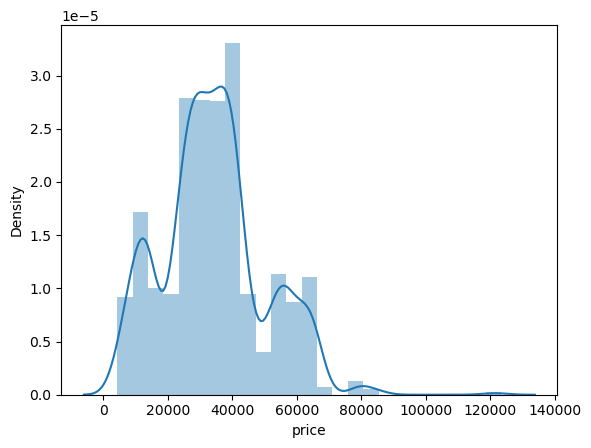

In [127]:
# Check for extreme values
sns.distplot(df_boats['price'], bins=25)
# There are a few extreme values but try first before eliminanting them

In [128]:
# Check stats for price

df_boats['price'].mean() # Check the mean

34162.634088762985

In [129]:
df_boats['price'].median() # Check the median

33500.0

In [130]:
df_boats['price'].max() # Check the max

123468

In [131]:
df_boats['price'].min() # Check the min

4300

In [132]:
# Hypothesis for analysis >>> Newer boats cost more than other boats. There might be exceptions though, i.e. vintage/historical boats

# 4. Data prep for regression

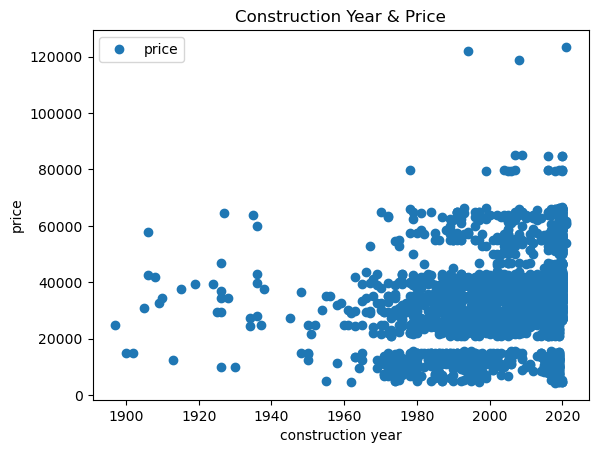

In [133]:
# Create scatterplot using matplotlib
df_boats.plot(x = 'year_built', y='price',style='o')
plt.title('Construction Year & Price')  
plt.xlabel('construction year')  
plt.ylabel('price')  
plt.show()

In [134]:
# Reshape variables into NumPy arrays and put them into separate objects
X = df_boats['year_built'].values.reshape(-1,1)
y = df_boats['price'].values.reshape(-1,1)

In [135]:
X

array([[2021],
       [2021],
       [2021],
       ...,
       [1902],
       [1900],
       [1897]])

In [136]:
y

array([[53754],
       [60753],
       [61079],
       ...,
       [15000],
       [15000],
       [25000]])

In [137]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression analysis

In [138]:
# Create regression object to be fit onto training set
regression = LinearRegression()

In [139]:
# Fit regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [140]:
# Predict values of y using X
y_predicted = regression.predict(X_test)

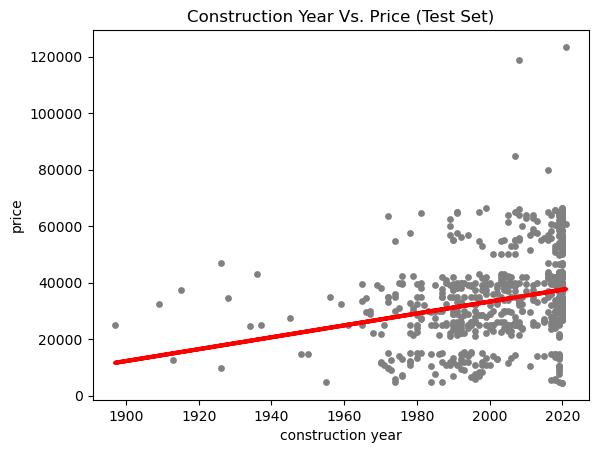

In [141]:
# Create plot that shows regression line from model on test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Construction Year Vs. Price (Test Set)')
plot_test.xlabel('construction year')
plot_test.ylabel('price')
plot_test.savefig('plot_test.png')
plot_test.show()

In [142]:
# Check model accuracy 
# Create objects containing model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # Mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score

In [143]:
# Print model summary statistics to evaluate model performance
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[210.56426832]]
Mean squared error:  239050163.14994034
R2 score:  0.09053683784457589


In [144]:
# A positive slope here indicates a positive relationship. As the construction year increases (i.e. the boat is newer), the price increases
# The MSE is quite large and hence it regression probably isn't the best model accurately predict the influence of construction year on price
# The R2 is close to 0, thus indicating a poor fit

In [145]:
y_predicted

array([[34348.74225585],
       [34348.74225585],
       [30558.58542602],
       [34980.43506082],
       [29295.19981608],
       [30979.71396267],
       [37507.20628071],
       [31821.97103597],
       [29295.19981608],
       [37296.64201239],
       [31400.84249932],
       [37507.20628071],
       [31400.84249932],
       [37296.64201239],
       [37507.20628071],
       [36664.94920742],
       [28242.37847446],
       [34980.43506082],
       [30348.0211577 ],
       [32874.79237759],
       [37296.64201239],
       [31611.40676764],
       [31190.27823099],
       [32453.66384094],
       [30137.45688937],
       [34138.17798753],
       [37507.20628071],
       [28242.37847446],
       [33506.48518256],
       [32243.09957261],
       [24662.78591295],
       [34980.43506082],
       [37296.64201239],
       [31611.40676764],
       [32664.22810926],
       [32243.09957261],
       [28031.81420614],
       [37507.20628071],
       [34138.17798753],
       [33295.92091423],


In [146]:
# Create dataframe comparing actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)
# As we can see, there's quite a difference between actual and predicted values, confirming the model isn't the best approach here

,Actual,Predicted
0,11500,34348.742256
1,39900,34348.742256
2,25000,30558.585426
3,119000,34980.435061
4,64500,29295.199816
5,60000,30979.713963
6,39900,37507.206281
7,35000,31821.971036
8,37990,29295.199816
9,62167,37296.642012


In [147]:
# Compare how the regression fits the training set

# Predict X train
y_predicted_train = regression.predict(X_train)

In [148]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [149]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)
# Similar thoughts as for test set

Slope: [[210.56426832]]
Mean squared error:  236227309.42097425
R2 score:  0.05856665702834862


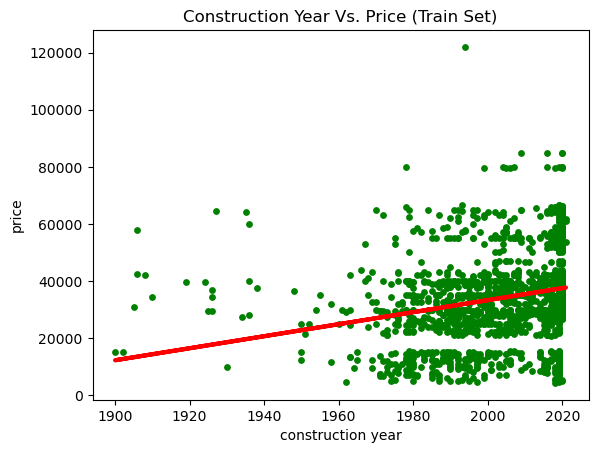

In [150]:
# Visualize training set results
plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s = 15)
plot_train.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_train.title('Construction Year Vs. Price (Train Set)')
plot_train.xlabel('construction year')
plot_train.ylabel('price')
plot_train.savefig('plot_train.png')
plot_train.show()

In [151]:
# Conclusions 
# The linear regression model applied is inaccurate in this case
# We can rule out the initial hypotheses "Newer boats cost more than older boats"
# Construction year does influence price but apparently not in a linear way
# We will need to explore other models (e.g. multiple regression model)